In [1]:
import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math
import math
import collections
from itertools import compress
from collections import Counter
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [2]:
#source - https://nathanrooy.github.io/posts/2016-09-07/haversine-with-python/# y1 = latitudes

class Haversine:
    '''
    use the haversine class to calculate the distance between
    two lon/lat coordnate pairs.
    output distance available in kilometers, meters, miles, and feet.
    example usage: Haversine([lon1,lat1],[lon2,lat2]).feet
    
    '''
    def __init__(self,coord1,coord2):
        lon1,lat1=coord1
        lon2,lat2=coord2
        
        R=6371000                               # radius of Earth in meters
        phi_1=math.radians(lat1)
        phi_2=math.radians(lat2)

        delta_phi=math.radians(lat2-lat1)
        delta_lambda=math.radians(lon2-lon1)

        a=math.sin(delta_phi/2.0)**2+\
           math.cos(phi_1)*math.cos(phi_2)*\
           math.sin(delta_lambda/2.0)**2
        c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
        
        self.meters=R*c                         # output distance in meters
        self.km=self.meters/1000.0              # output distance in kilometers
        self.miles=self.meters*0.000621371      # output distance in miles
        self.feet=self.miles*5280               # output distance in feet

if __name__ == "__Haversine__":
    main()

In [3]:
# The function find_nearest() takes an array and a value as input. It returns the index of the nearest value and the 
# nearest value.

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return (idx, array[idx])

In [4]:
# This function checkIfDuplicates_3() takes a list as input and returns true if any element has a count of more than 3.

def checkIfDuplicates_3(listOfElems):
    for elem in listOfElems:
        if listOfElems.count(elem) > 3:
            return True
    return False

In [5]:
def round_latlong(list_):
    a = math.floor(list_[0] * 4) / 4
    b = math.ceil(list_[1] * 4) / 4
    
    return [a,b]

In [6]:
#source - https://bryceboe.com/2006/10/23/line-segment-intersection-algorithm/

class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

def ccw(A,B,C):
    return (C.y-A.y)*(B.x-A.x) > (B.y-A.y)*(C.x-A.x)

def intersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)


In [7]:
def intesect1(P1,P2,P3,P4):
    A = Point(P1[0],P1[1])
    B = Point(P2[0],P2[1])
    C = Point(P3[0],P3[1])
    D = Point(P4[0],P4[1])
    
    return intersect(A,B,C,D)

In [8]:
#source - http://paulbourke.net/geometry/pointlineplane/javascript.txt


def inter_point(x1,y1,x2,y2,x3,y3,x4,y4):
# Check if none of the lines are of length 0
    if ((x1 == x2 and y1 == y2) or (x3 == x4 and y3 == y4)):
        return false


    denominator = ((y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1))

    # Lines are parallel
    if (denominator == 0): 
        return false


    ua = ((x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)) / denominator
    ub = ((x2 - x1) * (y1 - y3) - (y2 - y1) * (x1 - x3)) / denominator

    # is the intersection along the segments
    if (ua < 0 or ua > 1 or ub < 0 or ub > 1) :
        return false


    # Return a object with the x and y coordinates of the intersection
    x = x1 + ua * (x2 - x1)
    y = y1 + ua * (y2 - y1)

    return x, y

In [9]:
# This function line_points() takes a dataframe and a list as arguments. The df is the dataframe of coastal or ridge points
# and the list is the list of points in the current grid with the previous and next point of every corner point. If all the 
# coast or ridge points in the current grid were sequential the problem would have been much easier. But as there can be two or 
# more segments of coastal/ridge line we will have to consider each point individually. If there is a sequence in the list, the 
# previous and next point of the sequence is added for each sequence. For the time when the list starts at zero, -1 is excluded.
# For the last point of the dataframe there is no next point. So that is also exvcluded. Except for these two cases whenever
# there are two consequetive number in the list, the line is considered to be a valid line and added in the list named 'lines'.


def line_points(df,list_): 
    lines = []
    for ele in list_:
        if ele+1 in list_ and df.shape[0]>(ele+1) and ele!=-1:
            lines.append([[df.loc[ele,'long'],df.loc[ele,'lat']], [df.loc[ele+1,'long'],df.loc[ele+1,'lat']]])
        else:
            pass
    return lines

In [10]:
latitudes = np.arange(28,18.99,-.25)  # This is the range of latitude in the target area
print(latitudes)
longitudes = np.arange(84, 96.1, .25) # This is the range of longitude in the target area
print(longitudes)

[28.   27.75 27.5  27.25 27.   26.75 26.5  26.25 26.   25.75 25.5  25.25
 25.   24.75 24.5  24.25 24.   23.75 23.5  23.25 23.   22.75 22.5  22.25
 22.   21.75 21.5  21.25 21.   20.75 20.5  20.25 20.   19.75 19.5  19.25
 19.  ]
[84.   84.25 84.5  84.75 85.   85.25 85.5  85.75 86.   86.25 86.5  86.75
 87.   87.25 87.5  87.75 88.   88.25 88.5  88.75 89.   89.25 89.5  89.75
 90.   90.25 90.5  90.75 91.   91.25 91.5  91.75 92.   92.25 92.5  92.75
 93.   93.25 93.5  93.75 94.   94.25 94.5  94.75 95.   95.25 95.5  95.75
 96.  ]


In [11]:
x, y = np.meshgrid(longitudes, latitudes)

In [17]:
# This map contains the points along the perimeter of Bangladesh and its districts. 
BD_map = pd.read_excel('map.xlsx')

In [12]:
u10 = pd.read_csv('u10.csv', header=None)
u10 = np.array(u10)
v10 = pd.read_csv('v10.csv', header=None)
v10 = np.array(v10)

In [13]:
# This file contains the points along the Himalayan ridgeline
r = pd.read_excel('position_densified.xlsx', sheet_name = 'ridge')
# This file contains the points along the coastline of the Bay of Bengal
c = pd.read_excel('position_densified.xlsx', sheet_name = 'coast')

In [14]:
# This list contains the starting points of the grid cells for the points along the ridgeline 
ridge_start = r.apply(lambda row : round_latlong([row['long'], row['lat']]), axis = 1)
# This list contains the starting points of the grid cells for the points along the coastline 
coast_start = c.apply(lambda row : round_latlong([row['long'], row['lat']]), axis = 1)
ridge_start = ridge_start.tolist()
coast_start = coast_start.tolist()
ridge_start = np.array(ridge_start)
coast_start = np.array(coast_start)

In [15]:
list_of_points = [[86,26.5], [90.15,24.2]]

In [18]:
type_ = [] # The four types are, 'r' (touches the ridgeline), 'c' (touches the coastline), 
           # 'o' (gets outside the target area before reaching ridgeline or coastline, and 'v' (goes to a wind vortex))
distance_ = [] # Total distance it covers to reach that point
time_ = [] # Total time it takes to reach that point
end_x = [] # The longitude of the point where the path ends
end_y = [] # The latitude of the point where the path ends
all_path = {}

location_no = -1
for long_lat in list_of_points: # for each poont in the list
    location_no = location_no +1
    all_path_for_dates = {} #in this dictionary, windpaths for all dates in this particular point will be stored
    for velos in range(506):

        
        df2 = u10[velos*74:(velos*74)+37,:]  # x components of velocities that day
        df3 = v10[velos*74:(velos*74)+37,:]  # y components of velocities that day
        df4 = np.sqrt((np.array(df2)) ** 2 + (np.array(df3)) ** 2)

        long, lat = long_lat[0], long_lat[1]

        total_time = []
        total_distance = []
        path = []
        starts = []

        # The position (index) and value of the nearest longitude and latitude is found here.
        
        Px, Lx = find_nearest(longitudes, long) 
        Py, Ly = find_nearest(latitudes, lat)
        
        # A box of 0.25 degree X 0.25 degree is imagined. cor_x_s,cor_x_e,cor_y_s,cor_y_e are the four corners. 
        # cor_x_s is on the left of cor_x_e. cor_y_s is above cor_y_e.

        if long>Lx: # If the current point is on the right to the nearest grid point
            cor_x_s = Px
        elif long<Lx: # If the current point is on the left to the nearest grid point
            cor_x_s = Px-1
        else: #If the current point is on the vertical grid, grid cell will be determined based on wind direction
            if df2[ Py,Px]>0: 
                cor_x_s = Px
            else:
                cor_x_s = Px-1    
            
            
        cor_x_e = cor_x_s + 1

        if lat>Ly: # If the current point is above the nearest grid point
            cor_y_s = Py-1
        elif lat<Ly: # If the current point is below the nearest grid point
            cor_y_s = Py 
        else: #If the current point is on the horiontal grid, grid cell will be determined based on wind direction
            if df3[ Py,Px,]>0:
                cor_y_s = Py-1
            else:
                cor_y_s = Py    
            
        cor_y_e = cor_y_s + 1
        
        path.append([long, lat])

        while cor_x_s>=0 and cor_x_e<=48 and cor_y_s>=0 and cor_y_e<=36: #as long as the wind path is within the area of data

            starts.append([cor_x_s,cor_y_s])
            
            # The loop breaks if there is a vortex and the same point appears in the same box more than three times
            if checkIfDuplicates_3(starts):
                type_.append('v')
                distance_.append(sum(total_distance))
                time_.append(sum(total_time))
                end_x.append(long)
                end_y.append(lat)
                break


            Px, Lx = find_nearest(longitudes, long)
            Py, Ly = find_nearest(latitudes, lat)

            if long==Lx and lat==Ly: # if the point is in the corner point of a grid, velocity of that point is directly used
                initial_u = df2[Py,Px]
                initial_v = df3[Py,Px]
            
            else: # else the interpolated velocity is used where closer grid corners has more weight

                d1 = 1 / (Haversine([long,lat],[longitudes[cor_x_s], latitudes[cor_y_s]])).km 
                d2 = 1 / (Haversine([long,lat],[longitudes[cor_x_e], latitudes[cor_y_s]])).km 
                d3 = 1 / (Haversine([long,lat],[longitudes[cor_x_s], latitudes[cor_y_e]])).km 
                d4 = 1 / (Haversine([long,lat],[longitudes[cor_x_e], latitudes[cor_y_e]])).km 

                d = d1+d2+d3+d4

                initial_u =  ((d1/d)*df2[cor_y_s,cor_x_s] + (d2/d)*df2[cor_y_s,cor_x_e]\
                             + (d3/d)*df2[cor_y_e,cor_x_s] + (d4/d)*df2[cor_y_e,cor_x_e])
                initial_v =  ((d1/d)*df3[cor_y_s,cor_x_s] + (d2/d)*df3[cor_y_s,cor_x_e]\
                             + (d3/d)*df3[cor_y_e,cor_x_s] + (d4/d)*df3[cor_y_e,cor_x_e])

            if initial_u > 0: 
                H = ((Haversine([long,lat],[longitudes[cor_x_e], lat])).km * 1000)
                time_horizontal = H / initial_u # The time it takes for the wind to reach the next vertical grid
                
                
                # In a special scenario where the velocity directions are very random. The wind can get from grid cell A to B,
                # then get back to A where A and B are located horizontally.
                
                if time_horizontal == 0: 
                    cor_x_s = cor_x_s + 1
                    cor_x_e = cor_x_e + 1
                    H = ((Haversine([long,lat],[longitudes[cor_x_e], lat])).km * 1000)
                    time_horizontal = H  / initial_u
                long_diff = longitudes[cor_x_e] - long
                H_direction = 'E'


            elif initial_u < 0: 
                H = ((Haversine([long,lat],[longitudes[cor_x_s], lat])).km * 1000)
                time_horizontal =  H / -initial_u

                if time_horizontal == 0:
                    cor_x_s = cor_x_s - 1
                    cor_x_e = cor_x_e - 1

                    H = ((Haversine([long,lat],[longitudes[cor_x_s], lat])).km * 1000)
                    time_horizontal = H / -initial_u
                long_diff = long -  longitudes[cor_x_s] 
                H_direction = 'W'

            if initial_v > 0:
                V = ((Haversine([long,lat],[long, latitudes[cor_y_s]])).km * 1000)
                time_vertical = V / initial_v # The time it takes for the wind to reach the next horizontal grid
                
                # In a special scenario where the velocity directions are very random. The wind can get from grid cell A to B,
                # then get back to A where A and B are located vertically.

                if time_vertical == 0:
                    cor_y_s = cor_y_s - 1
                    cor_y_e = cor_y_e - 1
                    V = ((Haversine([long,lat],[long, latitudes[cor_y_s]])).km * 1000)
                    time_vertical = V / initial_v
                lat_diff = latitudes[cor_y_s] - lat
                V_direction = 'N'

            elif initial_v < 0: 
                V = ((Haversine([long,lat],[long, latitudes[cor_y_e]])).km * 1000)
                time_vertical = V / -initial_v 

                if time_vertical == 0:
                    cor_y_s = cor_y_s + 1
                    cor_y_e = cor_y_e + 1
                    V = ((Haversine([long,lat],[long, latitudes[cor_y_e]])).km * 1000)
                    time_vertical = V / -initial_v
                lat_diff = lat - latitudes[cor_y_e] 
                V_direction = 'S'


            # The next grid is selected based on the time it takes for the wind to reach the next vertical and horizontal grid.
            # If it reaches the horizontal gridline earlier, next grid cell is on the vertical direction
            if time_vertical < time_horizontal or initial_u == 0:
                direction = V_direction
                H_distance = initial_u * time_vertical
                V_distance = initial_v * time_vertical

            elif time_vertical > time_horizontal  or initial_v == 0  :
                direction = H_direction
                H_distance = initial_u * time_horizontal
                V_distance = initial_v * time_horizontal

            elif time_vertical == time_horizontal:
                direction = V_direction
                H_distance = initial_u * time_vertical
                V_distance = initial_v * time_vertical


            new_y = lat + ((V_distance/V)*lat_diff)
            new_x = long + ((H_distance/H)*long_diff)
            
            
            #Now it is checked if the starting point of the current grid matches with the starting point of
            # any grid with coastal or ridge point.

            if_common = np.where(coast_start == [longitudes[cor_x_s], latitudes[cor_y_s]])[0]
            if_common_r = np.where(ridge_start == [longitudes[cor_x_s], latitudes[cor_y_s]])[0]
            
            # t is the list of coastal points that are in the current grid
            t=list(set([elem for elem in if_common if np.count_nonzero(if_common == elem) == 2]))
            # t_r is the list of ridge points that are in the current grid
            t_r=list(set([elem for elem in if_common_r if np.count_nonzero(if_common_r == elem) == 2]))

            if t: # if there is any coastal point in the current cell of wind 
                t=np.array(t)
                
                # the previous points and next points of all points in t is consided because all coast/ ridge points in 
                # the current grid might not be sequential. If they were only the previous point of the first point and 
                # next point of the last point would have been enough. But there can be two or more segments of coast/ ridge 
                # line in the current grid.                

                t1 = np.append(t, (t+1))
                t2 = np.append(t1, (t-1))
                t2=list(set(t2))
                t2.sort()
                t4 = line_points(c,t2)

                # There might be c/r points in the same grid but thats not enough. We will have to check if the c/r small 
                # line segments intersect the path of wind in the current grid.
                
                p =  list(map(lambda m: intesect1([long,lat],[new_x,new_y], t4[m][0], t4[m][1]), range(0, len(t4))))
                q = list(compress(t4, p))
                
                if q: # If there is atleast one intersection
                   
                    intersecting_distaces = []
                    for poi in q:
                     
                        intersecting_x, intersecting_y = inter_point(long,lat,new_x,new_y,poi[0][0],poi[0][1],poi[1][0],poi[1][1])
                        intersecting_distance1 = np.sqrt((long - intersecting_x)**2 + (lat - intersecting_y)**2)
                        intersecting_distaces.append(intersecting_distance1)
                    #print(intersecting_distaces)
                    min_index = intersecting_distaces.index(min(intersecting_distaces))
                    f_intersecting_x,f_intersecting_y = inter_point(long,lat,new_x,new_y,\
                                            q[min_index][0][0],q[min_index][0][1],q[min_index][1][0],q[min_index][1][1])
                    path.append([f_intersecting_x,f_intersecting_y])
                    last_d = ((Haversine([long,lat],[f_intersecting_x,f_intersecting_y]).km) * 1000)
                    total_distance.append(last_d)
                    last_t = last_d / (np.sqrt(initial_u**2+initial_v**2))
                    total_time.append(last_t)
                    type_.append('c')
                    distance_.append(sum(total_distance))
                    time_.append(sum(total_time))
                    end_x.append(f_intersecting_x)
                    end_y.append(f_intersecting_y)
                    break
       

            else:
                pass
            
            if t_r: # if there is any Himalayan ridge point in the current cell of wind 
                t=np.array(t_r)
               
                t1 = np.append(t, (t+1))
                t2 = np.append(t1, (t-1))
                t2=list(set(t2))
                t2.sort()
                t4 = line_points(r,t2)

                p =  list(map(lambda m: intesect1([long, lat],[new_x,new_y], t4[m][0], t4[m][1]), range(0, len(t4))))
                q = list(compress(t4, p))
                if q:

                    intersecting_distaces = []
                    for poi in q:
                        
                        intersecting_x, intersecting_y = inter_point(long,lat,new_x,new_y,poi[0][0],poi[0][1],poi[1][0],poi[1][1])
                        intersecting_distance1 = np.sqrt((long - intersecting_x)**2 + (lat - intersecting_y)**2)
                        intersecting_distaces.append(intersecting_distance1)

                    min_index = intersecting_distaces.index(min(intersecting_distaces))
                    f_intersecting_x,f_intersecting_y = inter_point(long,lat,new_x,new_y,\
                                            q[min_index][0][0],q[min_index][0][1],q[min_index][1][0],q[min_index][1][1])
                    path.append([f_intersecting_x,f_intersecting_y])
                    last_d = ((Haversine([long,lat],[f_intersecting_x,f_intersecting_y]).km) * 1000)
                    total_distance.append(last_d)
                    last_t = last_d / (np.sqrt(initial_u**2+initial_v**2))
                    total_time.append(last_t)
                    type_.append('r')
                    distance_.append(sum(total_distance))
                    time_.append(sum(total_time))
                    end_x.append(f_intersecting_x)
                    end_y.append(f_intersecting_y)
                    break


            else:
                pass


            time = min(time_vertical , time_horizontal)
            distance = time * df4[Py, Px]

            total_time.append(time)
            total_distance.append(distance)

            
            # The new cell is found based on the direction
            
            if direction == 'N':
                cor_y_e = cor_y_e - 1 
                cor_y_s = cor_y_s - 1 

            if direction == 'S':
                cor_y_e = cor_y_e + 1 
                cor_y_s = cor_y_s + 1 

            if direction == 'E':
                cor_x_e = cor_x_e + 1 
                cor_x_s = cor_x_s + 1 
            if direction == 'W':
                cor_x_e = cor_x_e - 1 
                cor_x_s = cor_x_s - 1
            
            long = new_x
            lat = new_y
            path.append([long,lat])



        if (long==84 or long==96) or (lat==19 or lat==28):
            type_.append('o')
            distance_.append(sum(total_distance))
            time_.append(sum(total_time))
            end_x.append(new_x)
            end_y.append(new_y)
            
        
  

    #         path2 = path.copy()
    #         path2 = np.array(path2)
    #         plt.figure(figsize=(10,10))
    #         n = np.sqrt(df2 ** 2 + df3 ** 2)
    #         df2 = df2 / n
    #         df3 = df3 / n
    #         plt.quiver(x, y, df2, df3, angles="xy")
    #         plt.plot(path2[:, 0], path2[:, 1], "-")
    #         plt.xlim([84, 96])
    #         plt.ylim([19, 28])
        all_path_for_dates[velos] = path
    all_path[location_no] = all_path_for_dates

In [21]:
all_path.keys()

dict_keys([0, 1])

In [22]:
len(type_)

1012

The wind comes from  c
The wind crosses  249540.56598959866  meter
It takes  165875.7200104573  second
The longitude of the starting point is  90.89499503703476  degree
The latitude of the starting point is  22.03951851234548  degree


(19.0, 28.0)

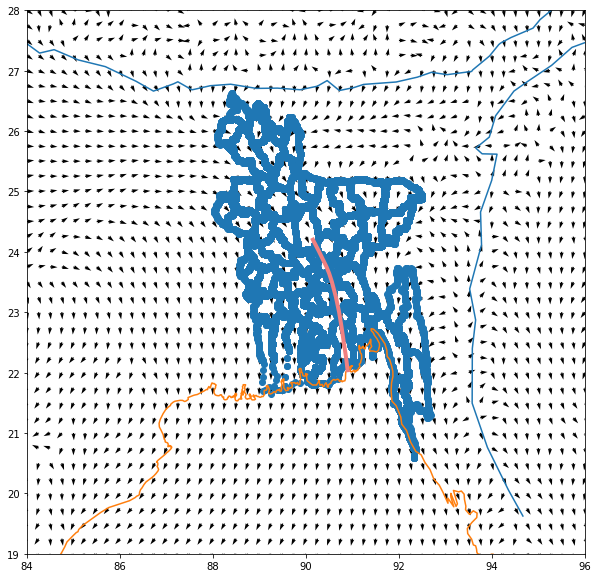

In [57]:
# The path wind follows from point 1 ([90.15,24.2]) in November, 2011. It reaches the coastline
bd_map = BD_map.iloc[::10, :]
location_number = 1 
month_from_1979 = 406
df2 = u10[month_from_1979*74:(month_from_1979*74)+37,:] 
df3 = v10[month_from_1979*74:(month_from_1979*74)+37,:]
print("The wind comes from " ,type_[location_number*506 + month_from_1979])
print("The wind crosses " ,distance_[location_number*506 + month_from_1979], " meter")
print("It takes " ,time_[location_number*506 + month_from_1979], " second")
print("The longitude of the starting point is ", end_x[location_number*506 + month_from_1979], " degree")
print("The latitude of the starting point is ", end_y[location_number*506 + month_from_1979], " degree")
path = all_path[1][month_from_1979]
path = np.array(path)
plt.figure(figsize=(10,10))
n = np.sqrt(df2 ** 2 + df3 ** 2)
df2 = df2 / n
df3 = df3 / n
plt.quiver(x, y, df2, df3, angles="xy")
plt.plot(r['long'], r['lat'])
plt.plot(c['long'], c['lat'])
plt.scatter(bd_map['long'], bd_map['lat'])
plt.plot(path[:, 0], path[:, 1] ,color='lightcoral',linewidth=4,linestyle= "-")
plt.xlim([84, 96])
plt.ylim([19, 28])

The wind comes from  c
The wind crosses  249540.56598959866  meter
It takes  165875.7200104573  second
The longitude of the starting point is  90.89499503703476  degree
The latitude of the starting point is  22.03951851234548  degree


(21.0, 25.0)

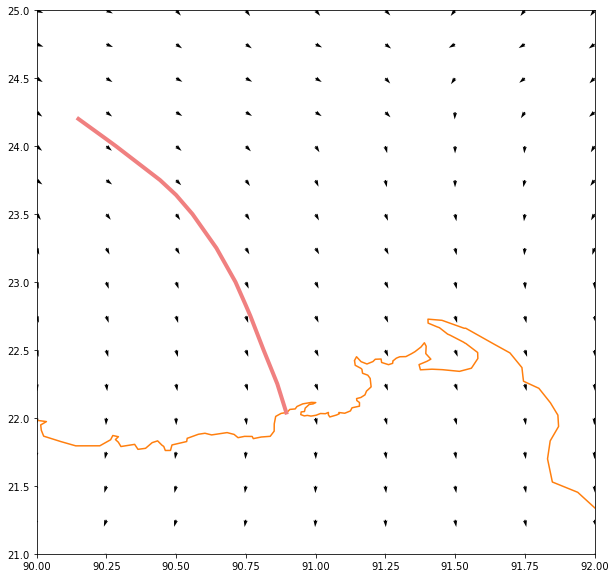

In [60]:
# The path wind follows from point 1 ([90.15,24.2]) in November, 2011. It reaches the coastline
#bd_map = BD_map.iloc[::10, :]
location_number = 1 
month_from_1979 = 406
df2 = u10[month_from_1979*74:(month_from_1979*74)+37,:] 
df3 = v10[month_from_1979*74:(month_from_1979*74)+37,:]
print("The wind comes from " ,type_[location_number*506 + month_from_1979])
print("The wind crosses " ,distance_[location_number*506 + month_from_1979], " meter")
print("It takes " ,time_[location_number*506 + month_from_1979], " second")
print("The longitude of the starting point is ", end_x[location_number*506 + month_from_1979], " degree")
print("The latitude of the starting point is ", end_y[location_number*506 + month_from_1979], " degree")
path = all_path[1][month_from_1979]
path = np.array(path)
plt.figure(figsize=(10,10))
n = np.sqrt(df2 ** 2 + df3 ** 2)
df2 = df2 / n
df3 = df3 / n
plt.quiver(x, y, df2, df3, angles="xy")
plt.plot(r['long'], r['lat'])
plt.plot(c['long'], c['lat'])
#plt.scatter(bd_map['long'], bd_map['lat'])
plt.plot(path[:, 0], path[:, 1] ,color='lightcoral',linewidth=4,linestyle= "-")
plt.xlim([90, 92])
plt.ylim([21, 25])

v


(19.0, 28.0)

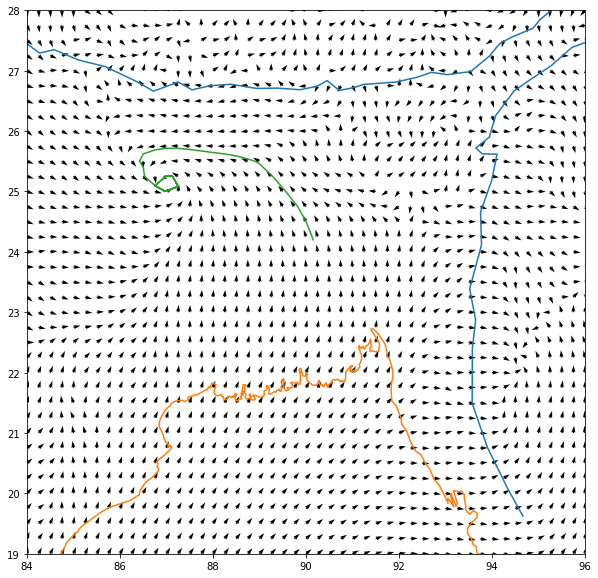

In [59]:
# The path wind follows from point 1 ([90.15,24.2]) in June, 1987.
location_number = 1
# bd_map = BD_map.iloc[::10, :]
month_from_1979 = 100
df2 = u10[month_from_1979*74:(month_from_1979*74)+37,:] 
df3 = v10[month_from_1979*74:(month_from_1979*74)+37,:]
print(type_[location_number*506 + month_from_1979])
path = all_path[1][month_from_1979]
path = np.array(path)
plt.figure(figsize=(10,10))
n = np.sqrt(df2 ** 2 + df3 ** 2)
df2 = df2 / n
df3 = df3 / n
plt.quiver(x, y, df2, df3, angles="xy")
plt.plot(r['long'], r['lat'])
plt.plot(c['long'], c['lat'])
#plt.scatter(bd_map['long'], bd_map['lat'])
plt.plot(path[:, 0], path[:, 1])
plt.xlim([84, 96])
plt.ylim([19, 28])

The wind comes from  c
The wind crosses  249540.56598959866  meter
It takes  165875.7200104573  second
The longitude of the starting point is  90.89499503703476  degree
The latitude of the starting point is  22.03951851234548  degree


(19.0, 28.0)

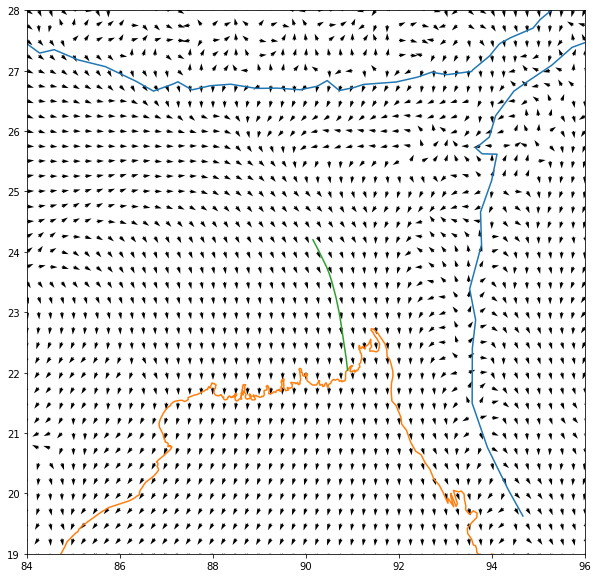

In [29]:
# The path wind follows from point 1 ([90.15,24.2]) in November, 2011. It reaches the coastline
location_number = 1 
month_from_1979 = 406
df2 = u10[month_from_1979*74:(month_from_1979*74)+37,:] 
df3 = v10[month_from_1979*74:(month_from_1979*74)+37,:]
print("The wind comes from " ,type_[location_number*506 + month_from_1979])
print("The wind crosses " ,distance_[location_number*506 + month_from_1979], " meter")
print("It takes " ,time_[location_number*506 + month_from_1979], " second")
print("The longitude of the starting point is ", end_x[location_number*506 + month_from_1979], " degree")
print("The latitude of the starting point is ", end_y[location_number*506 + month_from_1979], " degree")
path = all_path[1][month_from_1979]
path = np.array(path)
plt.figure(figsize=(10,10))
n = np.sqrt(df2 ** 2 + df3 ** 2)
df2 = df2 / n
df3 = df3 / n
plt.quiver(x, y, df2, df3, angles="xy")
plt.plot(r['long'], r['lat'])
plt.plot(c['long'], c['lat'])
#plt.scatter(trail11['long'], trail11['lat'])
plt.plot(path[:, 0], path[:, 1], "-")
plt.xlim([84, 96])
plt.ylim([19, 28])


The wind comes from  o
The wind crosses  679985.3434466199  meter
It takes  1815172.7780734994  second
The longitude of the starting point is  84.0  degree
The latitude of the starting point is  25.626913575171454  degree


(19.0, 28.0)

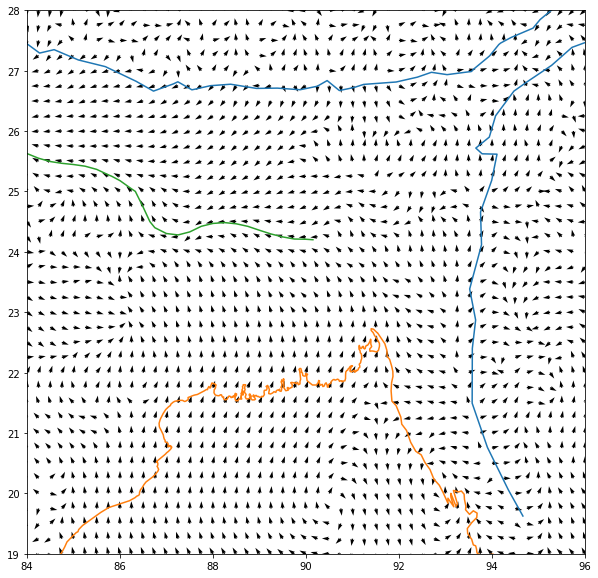

In [54]:
# The path wind follows from point 1 ([90.15,24.2]) in October, 1979. It reaches the outside the target area
location_number = 1 
month_from_1979 = 9
df2 = u10[month_from_1979*74:(month_from_1979*74)+37,:] 
df3 = v10[month_from_1979*74:(month_from_1979*74)+37,:]
print("The wind comes from " ,type_[location_number*506 + month_from_1979])
print("The wind crosses " ,distance_[location_number*506 + month_from_1979], " meter")
print("It takes " ,time_[location_number*506 + month_from_1979], " second")
print("The longitude of the starting point is ", end_x[location_number*506 + month_from_1979], " degree")
print("The latitude of the starting point is ", end_y[location_number*506 + month_from_1979], " degree")
path = all_path[1][month_from_1979]
path = np.array(path)
plt.figure(figsize=(10,10))
n = np.sqrt(df2 ** 2 + df3 ** 2)
df2 = df2 / n
df3 = df3 / n
plt.quiver(x, y, df2, df3, angles="xy")
plt.plot(r['long'], r['lat'])
plt.plot(c['long'], c['lat'])
#plt.scatter(trail11['long'], trail11['lat'])
plt.plot(path[:, 0], path[:, 1], "-")
plt.xlim([84, 96])
plt.ylim([19, 28])


The wind comes from  r
The wind crosses  571003.2086294945  meter
It takes  620207.8787029823  second
The longitude of the starting point is  93.90670878441004  degree
The latitude of the starting point is  20.75522025702443  degree


(19.0, 28.0)

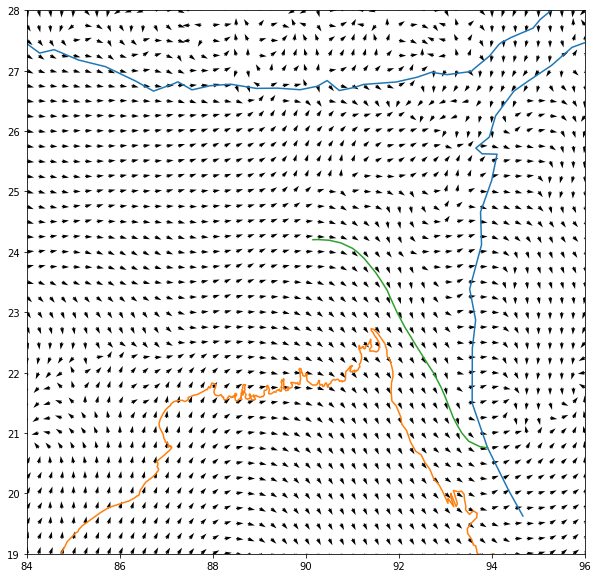

In [49]:
# The path wind follows from point 1 ([90.15,24.2]) in in March, 1982. It reaches the Himalayan ridgeline in the Southern part
location_number = 1 
month_from_1979 = 38
df2 = u10[month_from_1979*74:(month_from_1979*74)+37,:] 
df3 = v10[month_from_1979*74:(month_from_1979*74)+37,:]
print("The wind comes from " ,type_[location_number*506 + month_from_1979])
print("The wind crosses " ,distance_[location_number*506 + month_from_1979], " meter")
print("It takes " ,time_[location_number*506 + month_from_1979], " second")
print("The longitude of the starting point is ", end_x[location_number*506 + month_from_1979], " degree")
print("The latitude of the starting point is ", end_y[location_number*506 + month_from_1979], " degree")
path = all_path[1][month_from_1979]
path = np.array(path)
plt.figure(figsize=(10,10))
n = np.sqrt(df2 ** 2 + df3 ** 2)
df2 = df2 / n
df3 = df3 / n
plt.quiver(x, y, df2, df3, angles="xy")
plt.plot(r['long'], r['lat'])
plt.plot(c['long'], c['lat'])
#plt.scatter(trail11['long'], trail11['lat'])
plt.plot(path[:, 0], path[:, 1], "-")
plt.xlim([84, 96])
plt.ylim([19, 28])


The wind comes from  r
The wind crosses  312377.02803079685  meter
It takes  433443.67780296475  second
The longitude of the starting point is  89.61474629553287  degree
The latitude of the starting point is  26.697385933318717  degree


(19.0, 28.0)

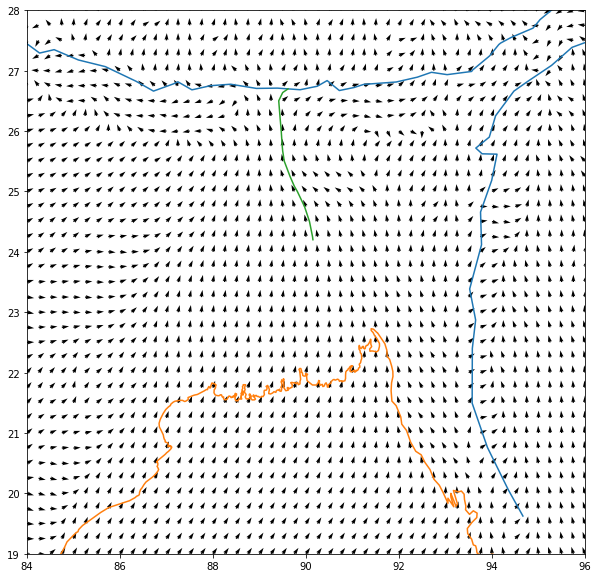

In [53]:
# The path wind follows to reach point  1 ([90.15,24.2]) in September, 1982. It reaches the Himalayan ridgeline in the Northern part
location_number = 1 
month_from_1979 = 44
df2 = u10[month_from_1979*74:(month_from_1979*74)+37,:] 
df3 = v10[month_from_1979*74:(month_from_1979*74)+37,:]
print("The wind comes from " ,type_[location_number*506 + month_from_1979])
print("The wind crosses " ,distance_[location_number*506 + month_from_1979], " meter")
print("It takes " ,time_[location_number*506 + month_from_1979], " second")
print("The longitude of the starting point is ", end_x[location_number*506 + month_from_1979], " degree")
print("The latitude of the starting point is ", end_y[location_number*506 + month_from_1979], " degree")
path = all_path[1][month_from_1979]
path = np.array(path)
plt.figure(figsize=(10,10))
n = np.sqrt(df2 ** 2 + df3 ** 2)
df2 = df2 / n
df3 = df3 / n
plt.quiver(x, y, df2, df3, angles="xy")
plt.plot(r['long'], r['lat'])
plt.plot(c['long'], c['lat'])
#plt.scatter(trail11['long'], trail11['lat'])
plt.plot(path[:, 0], path[:, 1], "-")
plt.xlim([84, 96])
plt.ylim([19, 28])